Assignment practice


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
order = pd.read_excel("Retail_dataset.xlsx", sheet_name = 'orders')
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [3]:
order.shape

(99441, 7)

In [4]:
order.order_id.duplicated().sum()

0

In [5]:
## one customer can have multiple orders/items
order.customer_id.duplicated().sum()

3345

In [6]:
order.customer_id.value_counts().sort_values(ascending= False).head()

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
Name: customer_id, dtype: int64

In [7]:
order.head(4)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15


In [8]:
order.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [9]:
order = order[order.order_status == 'delivered']
order.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13


In [10]:
order.order_status.value_counts()

delivered    96478
Name: order_status, dtype: int64

In [11]:
order.shape

(96478, 7)

In [12]:
order.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26
5,a4591c265e18cb1dcee52889e2d8acc3,80bb27c7c16e8f973207a5086ab329e2,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-26 10:57:55,2017-08-01
7,6514b8ad8028c9f2cc2374ded245783f,932afa1e708222e5821dac9cd5db4cae,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-26 12:55:51,2017-06-07
8,76c6e866289321a7c93b82b54852dc33,39382392765b6dc74812866ee5ee92a7,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-02-02 14:08:10,2017-03-06
9,e69bfb5eb88e0ed6a785585b27e16dbf,299905e3934e9e181bfb2e164dd4b4f8,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-16 17:14:30,2017-08-23
10,e6ce16cb79ec1d90b1da9085a6118aeb,f2a85dec752b8517b5e58a06ff3cd937,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-29 11:18:31,2017-06-07


In [13]:
order.order_status.value_counts('unavailable')

delivered    1.0
Name: order_status, dtype: float64

In [14]:
order.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_timestamp         8
order_estimated_delivery_date     0
dtype: int64

In [15]:
order.isna().sum().sort_values(ascending= False)

order_approved_at                14
order_delivered_timestamp         8
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_estimated_delivery_date     0
dtype: int64

In [16]:
order.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date'],
      dtype='object')

We see that we have null values here

order_approved_at                14 and 
order_delivered_timestamp         8

so we try to fill the null values

In [17]:
order.order_approved_at.fillna(order.order_purchase_timestamp, inplace = True)
order.order_delivered_timestamp.fillna(order.order_estimated_delivery_date, inplace = True)

In [18]:
order.isna().sum().sort_values(ascending= False)

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

we are done with orders sheet

In [19]:
order_items = pd.read_excel("Retail_dataset.xlsx", sheet_name = 'order_items')
order_items.head(5)

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [20]:
order_items.shape

(112650, 6)

In [21]:
order_items.isna().sum().sort_values(ascending= False)

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

In [22]:
customers = pd.read_excel("Retail_dataset.xlsx", sheet_name = 'customers')
customers.head(5)

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [23]:
customers.shape

(99441, 4)

In [24]:
customers.isna().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [25]:
customers.customer_id.duplicated().sum()

3345

if we want to see which values are duplicated

In [26]:
customers [ customers.customer_id.duplicated() ]

,customer_id,customer_zip_code_prefix,customer_city,customer_state
679,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,788313d21c3507fe890921f6e17aa679,11070,santos,SP
...,...,...,...,...
99324,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


which is 3345 i.e same what we saw earlier

how many duplicates?

In [27]:
customers [ customers.customer_id.duplicated() ].shape

(3345, 4)

In [28]:
customers.shape

(99441, 4)

out of 99441 3345 values are duplicates

What to do with the duplicates? ?

In [29]:
customers.drop_duplicates(subset= 'customer_id', keep = 'first')

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [30]:
customers.head(10)

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [31]:
customers.drop_duplicates(subset= 'customer_id', keep = 'first').shape

(96096, 4)

In [32]:
customers.shape

(99441, 4)

9941-96096 = 3345..which we saw earlier

In [33]:
customers.drop_duplicates(subset= 'customer_id', keep = 'first', inplace = True)
customers.shape

(96096, 4)

we did it because it must reflect in our data frame

In [34]:
customers.customer_id.duplicated().sum()

0

In [35]:
payments = pd.read_excel("Retail_dataset.xlsx", sheet_name="payments")

In [36]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [37]:
payments.shape

(103886, 5)

In [38]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [39]:
products = pd.read_excel("Retail_dataset.xlsx", sheet_name = "products")
products.head(10)

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,musical_instruments,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,furniture_decor,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,home_appliances,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,toys,600.0,17.0,10.0,12.0


In [40]:
products.isna().sum().sort_values(ascending = False)

product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
product_id                 0
dtype: int64

In [41]:
products.product_category_name.value_counts()

toys                                 24725
bed_bath_table                         789
sports_leisure                         721
furniture_decor                        687
health_beauty                          648
                                     ...  
home_comfort_2                           1
diapers_and_hygiene                      1
furniture_mattress_and_upholstery        1
security_and_services                    1
fashion_childrens_clothes                1
Name: product_category_name, Length: 70, dtype: int64

In [42]:
products.product_weight_g.value_counts()

200.0      2084
300.0      1561
150.0      1259
400.0      1206
100.0      1188
           ... 
1540.0        1
4480.0        1
508.0         1
2541.0        1
19900.0       1
Name: product_weight_g, Length: 2204, dtype: int64

In [43]:
products.product_length_cm.value_counts()

16.0    5520
20.0    2816
30.0    2029
18.0    1502
25.0    1387
        ... 
96.0       4
10.0       3
8.0        2
9.0        2
7.0        1
Name: product_length_cm, Length: 99, dtype: int64

In [44]:
products.product_height_cm.value_counts()

10.0    2548
15.0    2022
20.0    1991
16.0    1595
11.0    1551
        ... 
98.0       2
97.0       2
99.0       1
94.0       1
89.0       1
Name: product_height_cm, Length: 102, dtype: int64

In [45]:
products.product_width_cm.value_counts()

11.0     3718
20.0     3053
16.0     2808
15.0     2393
30.0     1786
         ... 
118.0       1
98.0        1
95.0        1
103.0       1
97.0        1
Name: product_width_cm, Length: 95, dtype: int64

In [46]:
products.product_category_name.mode()

0    toys
dtype: object

we have a series here, so lets take the zeroth position and will fill by toys

In [47]:
products.product_category_name.mode()[0]

'toys'

In [48]:
products.product_category_name.fillna(products.product_category_name.mode()[0], inplace = True)

In [49]:
products.isna().sum().sort_values(ascending = False)

product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
product_id               0
product_category_name    0
dtype: int64

In [50]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32951 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


the problem now lies with the weight, length, height and width

In [51]:
products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


mean and the 50% distribution is far away

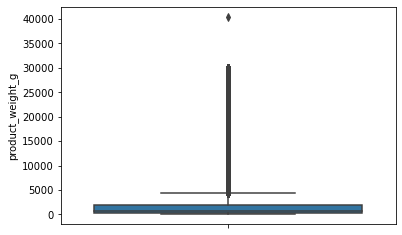

In [52]:
sns.boxplot(y = products.product_weight_g);

In [53]:
products.product_weight_g.median()

700.0

In [54]:
products.product_length_cm.median()

25.0

In [55]:
products.product_height_cm.median()

13.0

In [56]:
products.product_width_cm.median()

20.0

In [57]:
products.product_weight_g.fillna(products.product_weight_g.median(), inplace= True)
products.product_length_cm.fillna(products.product_length_cm.median(), inplace= True)
products.product_height_cm.fillna(products.product_height_cm.median(), inplace= True)
products.product_width_cm.fillna(products.product_width_cm.median(), inplace= True)

In [58]:
products.isna().sum().sort_values(ascending = False)

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

In [59]:
order = pd.DataFrame(order)
order_items = pd.DataFrame(order_items)
customers = pd.DataFrame(customers)
payments = pd.DataFrame(payments)
products = pd.DataFrame(products)

In [60]:
writer = pd.ExcelWriter('cleaned_data.xlsx', engine='xlsxwriter')
order.to_excel(writer, sheet_name='orders')
order_items.to_excel(writer, sheet_name='order_items')
customers.to_excel(writer, sheet_name='customers')
payments.to_excel(writer, sheet_name='payments')
products.to_excel(writer, sheet_name='products')
writer.save()

# MBA

In [61]:
#External package need to install
!pip install apyori

In [62]:
##Requirement already satisfied: apyori in c:\users\cbanerj1\anaconda3\lib\site-packages (1.1.2)
from apyori import apriori

In [63]:
!pip install mlxtend

In [64]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [65]:
mba_cleaned_data = pd.read_excel('cleaned_data.xlsx',sheet_name='order_items')
mba_cleaned_data.head()

,Unnamed: 0,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [66]:
Cleaned_product = pd.read_excel('cleaned_data.xlsx',sheet_name='products')
Cleaned_product.head()

,Unnamed: 0,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225,16,10,14
1,1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000,30,18,20
2,2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154,18,9,15
3,3,cef67bcfe19066a932b7673e239eb23d,baby,371,26,4,26
4,4,9dc1a7de274444849c219cff195d0b71,housewares,625,20,17,13


In [67]:
df = pd.merge(mba_cleaned_data, Cleaned_product, how='inner', on = 'product_id')
df.head()

,Unnamed: 0_x,order_id,order_item_id,product_id,seller_id,price,shipping_charges,Unnamed: 0_y,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,25865,toys,650,28,9,14
1,8346,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,25865,toys,650,28,9,14
2,36646,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,25865,toys,650,28,9,14
3,49108,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,25865,toys,650,28,9,14
4,55021,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,25865,toys,650,28,9,14


In [68]:
df = df.drop(['Unnamed: 0_x','Unnamed: 0_y'], axis=1)

In [69]:
df.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650,28,9,14
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650,28,9,14
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650,28,9,14
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650,28,9,14
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650,28,9,14


In [70]:
new_basket = (df[df['price'] <100]
          .groupby(['order_id', 'product_category_name'])['order_item_id']
          .sum().unstack().reset_index().fillna(0)
          .set_index('order_id'))

In [71]:
new_basket

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,pet_shop,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
00024acbcdf0a6daa1e931b038114c75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
00048cc3ae777c65dbb7d2a0634bc1ea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00054e8431b9d7675808bcb819fb4a32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0005f50442cb953dcd1d21e1fb923495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffb2ef8874127f75b52b643880fd7e0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
fffb9224b6fc7c43ebb0904318b10b5f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
fffce4705a9662cd70adb13d4a31832d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [72]:
def encode_units(x):
    if x <= 0:
        return 0
    if x > 0:
        return 1

basket_set = new_basket.applymap(encode_units)

In [73]:
# call apriori function and pass minimum support here we are passing 0.03%. 
# means 0.03 times in total number of transaction the item should be present.
frequent_itemset = apriori(basket_set, min_support=0.00001, use_colnames=True)

In [74]:
frequent_itemset

,support,itemsets
0,0.000404,(agro_industry_and_commerce)
1,0.000372,(air_conditioning)
2,0.000146,(art)
3,0.000065,(arts_and_craftmanship)
4,0.001828,(audio)
...,...,...
132,0.000016,"(toys, health_beauty, bed_bath_table)"
133,0.000016,"(toys, bed_bath_table, housewares)"
134,0.000016,"(office_furniture, toys, bed_bath_table)"
135,0.000016,"(computers_accessories, home_construction, toys)"


In [75]:
rules = association_rules(frequent_itemset, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(baby),(fashion_shoes),0.006924,0.000987,0.000016,0.002336,2.367474,0.000009,1.001353
1,(fashion_shoes),(baby),0.000987,0.006924,0.000016,0.016393,2.367474,0.000009,1.009627
2,(books_general_interest),(cool_stuff),0.000922,0.006132,0.000016,0.017544,2.861177,0.000011,1.011616
3,(cool_stuff),(books_general_interest),0.006132,0.000922,0.000016,0.002639,2.861177,0.000011,1.001721
4,(consoles_games),(pet_shop),0.001990,0.004190,0.000016,0.008130,1.940233,0.000008,1.003972
5,(pet_shop),(consoles_games),0.004190,0.001990,0.000016,0.003861,1.940233,0.000008,1.001878
6,(costruction_tools_garden),(flowers),0.001035,0.000178,0.000016,0.015625,87.798295,0.000016,1.015692
7,(flowers),(costruction_tools_garden),0.000178,0.001035,0.000016,0.090909,87.798295,0.000016,1.098861
8,"(health_beauty, bed_bath_table)",(toys),0.000016,0.755023,0.000016,1.000000,1.324462,0.000004,inf
9,(toys),"(health_beauty, bed_bath_table)",0.755023,0.000016,0.000016,0.000021,1.324462,0.000004,1.000005


In [76]:
# rules_mlxtend.rename(columns={'antecedents':'lhs','consequents':'rhs'})

# as based business use case we can sort based on confidance and lift.
rules[ (rules['lift'] >= 2) & (rules['confidence'] >= 0.002) ].head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(baby),(fashion_shoes),0.006924,0.000987,0.000016,0.002336,2.367474,0.000009,1.001353
1,(fashion_shoes),(baby),0.000987,0.006924,0.000016,0.016393,2.367474,0.000009,1.009627
2,(books_general_interest),(cool_stuff),0.000922,0.006132,0.000016,0.017544,2.861177,0.000011,1.011616
3,(cool_stuff),(books_general_interest),0.006132,0.000922,0.000016,0.002639,2.861177,0.000011,1.001721
6,(costruction_tools_garden),(flowers),0.001035,0.000178,0.000016,0.015625,87.798295,0.000016,1.015692
7,(flowers),(costruction_tools_garden),0.000178,0.001035,0.000016,0.090909,87.798295,0.000016,1.098861
10,"(office_furniture, toys)",(bed_bath_table),0.000081,0.025675,0.000016,0.200000,7.789540,0.000014,1.217906
12,"(toys, bed_bath_table)",(office_furniture),0.003236,0.001537,0.000016,0.005000,3.253158,0.000011,1.003480
13,(office_furniture),"(toys, bed_bath_table)",0.001537,0.003236,0.000016,0.010526,3.253158,0.000011,1.007368
17,"(computers_accessories, toys)",(home_construction),0.001052,0.001213,0.000016,0.015385,12.678974,0.000015,1.014393


In [77]:
rules[ (rules['lift'] >= 2) & (rules['confidence'] >= 0.002) ].shape

(13, 9)

##Insights

Means: (cool_stuff)	 with antecedent_support is 0.6259% means this category is present in 0.6259% of overall transaction Similarly (cool_stuff)	with consequent support	is 0.1077% means this category is present in 0.1077% of overall transaction

Support: > support -> This measure gives an idea of how frequent `ItemSet` is in all the transactions. Like (fashion_shoes),(baby)} is present in 0.0015% of the transactions.

Confidence: This measure defines the likeliness of occurrence of consequent on the cart given that the cart already 
has the antecedents. 
So {fashion_shoes} -> {baby} as a confidence of 1.6%. In simple words their is an 1.63% chance of finding {fashion_shoes} , if the cart contains {baby}.

        Top 2 Categories will be:
        (electronics, toys)	-> (electronics, toys)	with 16.66%confidence
        (home_construction, toys) -> (computers_accessories) with 25% confidence


Lift for the items more than 1 is worth considering shich means 

This measure defines the likeliness of occurrence of consequent on the cart given that the cart already has the antecedent, but controlling the popularity of consequent. So lift of (fashion_shoes) w.r.t (baby) is 2.24. Which is quite good. Any lift value > 1 implies that the Association rule is worth considering.


leverage -> leverage(X -> Y) = P(X and Y) - (P(X)P(Y))

*Leverage measures the difference of X and Y appearing together in the data set and what would be expected if X and Y where statistically dependent. The rational in a sales setting is to find out how many more units (items X and Y together) are sold than expected from the independent sells.* 

which means the values closer to each others are likely to have same sales than sold individually. example: (toys, computers_accessories)	&    (home_construction)

#END

Thank you